2. Ekstraksi Data (Extract)

In [94]:
# import library
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
import pandas as pd
import requests
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import json
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

In [6]:
def cleaning_data(df):
    # Menghapus Duplikat
    df = df.drop_duplicates()

    # Menghapus kolom yang data kosongnya lebih dari 50%
    count_rows = len(df)
    max_data_len = int(count_rows / 2)

    # Mengganti data kosong menjadi NaN
    df = df.replace('', np.nan)

    # Mengganti NaN dengan nilai 0
    df = df.fillna(value=0)

    # Menentukan kolom yang akan dihapus
    columns_to_drop = []
    for column in df.columns:
        if df[column].isnull().sum() > max_data_len:
            columns_to_drop.append(column)

    # Menentukan kolom "Unnamed" untuk dihapus
    columns_to_drop += [col for col in df.columns if "Unnamed" in col or "unnamed" in col]

    # Menghapus kolom "Unnamed"
    df = df.drop(columns=columns_to_drop)

    return df

2.1 File CSV

In [57]:
project_data = pd.read_csv("datasource/projects_data.csv")
project_data

C:\Users\lenovo\AppData\Local\Temp\ipykernel_14480\2668720131.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  project_data = pd.read_csv("datasource/projects_data.csv")


,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,NaN,Y,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,NaN,NaN,NaN,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,NaN,N,L,Closed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
project_data = cleaning_data (project_data)

project_data

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,0,Y,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,0.0,0.0,0.0,0.0,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [61]:
electricity_access = pd.read_csv("DataSource/electricity_access_percent.csv", skiprows=4)
electricity_access

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,NaN,NaN
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,NaN,NaN
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,NaN,NaN
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,NaN,NaN
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,NaN,NaN
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,NaN,NaN
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,NaN,NaN


In [62]:
electricity_access = cleaning_data (electricity_access)
electricity_access

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,97.794670,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,0.0
260,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,60.386539,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,0.0
261,South Africa,ZAF,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,81.900000,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,0.0
262,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,0.0,0.0,0.0,0.0,0.0,0.0,...,22.714685,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,0.0


In [63]:
gdp_data = pd.read_csv("DataSource/gdp_data.csv", skiprows=4)
gdp_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09,NaN
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,NaN,NaN
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11,NaN
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10,NaN


In [64]:
gdp_data = cleaning_data (gdp_data)
gdp_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.687488e+09,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,0.000000e+00
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


In [65]:
mystery = pd.read_csv("DataSource/mystery.csv", encoding='utf-16')
mystery

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [66]:
mystery = cleaning_data (mystery)
mystery

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [67]:
pd_csv = pd.read_csv("DataSource/population_data.csv", skiprows=4)
pd_csv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0,NaN


In [68]:
pd_csv = cleaning_data (pd_csv)

pd_csv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [69]:
rural_population = pd.read_csv("DataSource/rural_population_percent.csv", skiprows=4)
rural_population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893,NaN
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430,NaN
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422,NaN
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684,NaN
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231,NaN
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218,NaN
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160,NaN


In [70]:
rural_population = cleaning_data (rural_population)

rural_population

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,69.398,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,38.846,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,62.125,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160


2,2 File JSON

In [73]:
with open('DataSource/population_data.json', 'r') as file:
    pd_json = json.load(file)

pd_json

[{'Country Name': 'Aruba',
  'Country Code': 'ABW',
  'Indicator Name': 'Population, total',
  'Indicator Code': 'SP.POP.TOTL',
  '1960': 54211.0,
  '1961': 55438.0,
  '1962': 56225.0,
  '1963': 56695.0,
  '1964': 57032.0,
  '1965': 57360.0,
  '1966': 57715.0,
  '1967': 58055.0,
  '1968': 58386.0,
  '1969': 58726.0,
  '1970': 59063.0,
  '1971': 59440.0,
  '1972': 59840.0,
  '1973': 60243.0,
  '1974': 60528.0,
  '1975': 60657.0,
  '1976': 60586.0,
  '1977': 60366.0,
  '1978': 60103.0,
  '1979': 59980.0,
  '1980': 60096.0,
  '1981': 60567.0,
  '1982': 61345.0,
  '1983': 62201.0,
  '1984': 62836.0,
  '1985': 63026.0,
  '1986': 62644.0,
  '1987': 61833.0,
  '1988': 61079.0,
  '1989': 61032.0,
  '1990': 62149.0,
  '1991': 64622.0,
  '1992': 68235.0,
  '1993': 72504.0,
  '1994': 76700.0,
  '1995': 80324.0,
  '1996': 83200.0,
  '1997': 85451.0,
  '1998': 87277.0,
  '1999': 89005.0,
  '2000': 90853.0,
  '2001': 92898.0,
  '2002': 94992.0,
  '2003': 97017.0,
  '2004': 98737.0,
  '2005': 100031.

In [74]:
pd_json = pd.DataFrame(pd_json)
pd_json

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [75]:
pd_json = cleaning_data (pd_json)
pd_json

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


2.3 File API

In [135]:
import requests
from pandas import json_normalize

API = "http://api.worldbank.org/v2/countries/br;cn;us;id/indicators/SP.POP.TOTL/?format=json&per_page=1000"

response = requests.get(API)

if response.status_code == 200:
    data = json_normalize(response.json()[1])
    pd_api = pd.DataFrame(data)
    print(pd_api)


    countryiso3code  date        value unit obs_status  decimal indicator.id  \
0               BRA  2023          NaN                        0  SP.POP.TOTL   
1               BRA  2022  215313498.0                        0  SP.POP.TOTL   
2               BRA  2021  214326223.0                        0  SP.POP.TOTL   
3               BRA  2020  213196304.0                        0  SP.POP.TOTL   
4               BRA  2019  211782878.0                        0  SP.POP.TOTL   
..              ...   ...          ...  ...        ...      ...          ...   
251             USA  1964  191889000.0                        0  SP.POP.TOTL   
252             USA  1963  189242000.0                        0  SP.POP.TOTL   
253             USA  1962  186538000.0                        0  SP.POP.TOTL   
254             USA  1961  183691000.0                        0  SP.POP.TOTL   
255             USA  1960  180671000.0                        0  SP.POP.TOTL   

       indicator.value country.id  coun

In [136]:
pd_api = cleaning_data (pd_api)
pd_api = pd_api [pd_api ["date"] != "2023"] #Karna kosong semuaa
pd_api


C:\Users\lenovo\AppData\Local\Temp\ipykernel_21532\2193885244.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('', np.nan)


,countryiso3code,date,value,unit,obs_status,decimal,indicator.id,indicator.value,country.id,country.value
1,BRA,2022,215313498.0,0.0,0.0,0,SP.POP.TOTL,"Population, total",BR,Brazil
2,BRA,2021,214326223.0,0.0,0.0,0,SP.POP.TOTL,"Population, total",BR,Brazil
3,BRA,2020,213196304.0,0.0,0.0,0,SP.POP.TOTL,"Population, total",BR,Brazil
4,BRA,2019,211782878.0,0.0,0.0,0,SP.POP.TOTL,"Population, total",BR,Brazil
5,BRA,2018,210166592.0,0.0,0.0,0,SP.POP.TOTL,"Population, total",BR,Brazil
...,...,...,...,...,...,...,...,...,...,...
251,USA,1964,191889000.0,0.0,0.0,0,SP.POP.TOTL,"Population, total",US,United States
252,USA,1963,189242000.0,0.0,0.0,0,SP.POP.TOTL,"Population, total",US,United States
253,USA,1962,186538000.0,0.0,0.0,0,SP.POP.TOTL,"Population, total",US,United States
254,USA,1961,183691000.0,0.0,0.0,0,SP.POP.TOTL,"Population, total",US,United States


2.4 File XML

In [80]:
with open("datasource/population_data.xml", "r") as f:
    xml_data = f.read()

soup = BeautifulSoup(xml_data, "lxml")

data = []
for record in soup.find_all("record"):
    record_data = {}
    for field in record.find_all("field"):
        name = field.get("name")
        value = field.text
        key = field.get("key")
        record_data[name] = value
        if key:
            record_data[name + "_key"] = key
    data.append(record_data)

pd_xml = pd.DataFrame(data)

pd_xml

,Country or Area,Country or Area_key,Item,Item_key,Year,Value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211
1,Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55438
2,Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56225
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1963,56695
4,Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57032
...,...,...,...,...,...,...
15307,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2013,15054506
15308,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2014,15411675
15309,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2015,15777451
15310,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2016,16150362


In [81]:
pd_xml = cleaning_data (pd_xml)
pd_xml

,Country or Area,Country or Area_key,Item,Item_key,Year,Value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211
1,Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55438
2,Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56225
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1963,56695
4,Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57032
...,...,...,...,...,...,...
15307,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2013,15054506
15308,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2014,15411675
15309,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2015,15777451
15310,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2016,16150362


2.5 File DB

In [77]:
# Connect to SQLite database
conn = sqlite3.connect("datasource/population_data.db")
cursor = conn.cursor()

# Perform select query
query = "SELECT * FROM population_data"
cursor.execute(query)

# Fetch all results
results = cursor.fetchall()

pd_db = pd.DataFrame(results)

pd_db

# Close connection
conn.close()

In [78]:
pd_db

,0,1,2,3,4,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


3. Transformasi Data (Transformation)

3.1 Combine data dari rural_population_percent.csv dan electricity_access_percent.csv

In [64]:
# Mengkombinasikan rural_population_percent.csv dengan electricity_access_percent.csv

combined_data = pd.merge(rural_population, electricity_access, on='Country Name')

combined_data


,Country Name,Country Code_x,Indicator Name_x,Indicator Code_x,1960_x,1961_x,1962_x,1963_x,1964_x,1965_x,...,2008_y,2009_y,2010_y,2011_y,2012_y,2013_y,2014_y,2015_y,2016_y,2017_y
0,Aruba,ABW,Rural population (% of total population),SP.RUR.TOTL.ZS,49.224,49.239,49.254,49.270,49.285,49.300,...,93.086166,93.354546,93.356292,93.942375,94.255814,94.578262,94.906723,95.238182,95.570145,0.0
1,Afghanistan,AFG,Rural population (% of total population),SP.RUR.TOTL.ZS,91.779,91.492,91.195,90.890,90.574,90.250,...,42.400000,44.854885,42.700000,43.222019,69.100000,67.259552,89.500000,71.500000,84.137138,0.0
2,Angola,AGO,Rural population (% of total population),SP.RUR.TOTL.ZS,89.565,89.202,88.796,88.376,87.942,87.496,...,31.268013,32.382469,33.514950,34.600000,35.821964,36.990490,32.000000,42.000000,40.520607,0.0
3,Albania,ALB,Rural population (% of total population),SP.RUR.TOTL.ZS,69.295,69.057,68.985,68.914,68.842,68.770,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
4,Andorra,AND,Rural population (% of total population),SP.RUR.TOTL.ZS,41.550,39.017,36.538,34.128,31.795,29.555,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Rural population (% of total population),SP.RUR.TOTL.ZS,0.000,0.000,0.000,0.000,0.000,0.000,...,97.794670,98.377060,0.000000,99.430435,99.773651,99.942505,99.993134,100.000000,100.000000,0.0
260,"Yemen, Rep.",YEM,Rural population (% of total population),SP.RUR.TOTL.ZS,90.900,90.541,90.169,89.784,89.386,88.974,...,60.386539,61.751400,63.134281,64.532181,65.942101,75.600000,66.100000,70.213905,71.642349,0.0
261,South Africa,ZAF,Rural population (% of total population),SP.RUR.TOTL.ZS,53.381,53.207,53.094,52.980,52.866,52.752,...,81.900000,82.700000,82.900000,84.700000,85.300000,85.400000,86.000000,85.500000,84.200000,0.0
262,Zambia,ZMB,Rural population (% of total population),SP.RUR.TOTL.ZS,81.855,81.049,80.215,79.288,77.985,76.628,...,22.714685,23.235649,22.000000,24.328644,24.894667,25.469702,27.900000,31.100000,27.219337,0.0


In [65]:
print(combined_data.columns)

Index(['Country Name', 'Country Code_x', 'Indicator Name_x',
       'Indicator Code_x', '1960_x', '1961_x', '1962_x', '1963_x', '1964_x',
       '1965_x',
       ...
       '2008_y', '2009_y', '2010_y', '2011_y', '2012_y', '2013_y', '2014_y',
       '2015_y', '2016_y', '2017_y'],
      dtype='object', length=123)


In [66]:
# Hapus kolom yang tidak diperlukan atau redundan
columns_to_drop = ['Country Code_x', 'Indicator Name_x', 'Indicator Code_x']  # Contoh kolom yang bisa dihapus


In [67]:
# Buat list semua kolom yang akan dihapus berdasarkan suffix
columns_to_drop += [col for col in combined_data.columns if col.endswith('_y')]

In [68]:
# Drop kolom yang tidak diperlukan
combined_data_clean = combined_data.drop(columns=columns_to_drop)

In [70]:
# Rename kolom yang relevan 
combined_data_clean.rename(columns=lambda x: x.rstrip('_x'), inplace=True)

In [71]:
combined_data_clean

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,49.224,49.239,49.254,49.270,49.285,49.300,49.315,49.330,49.346,...,56.217,56.579,56.941,57.302,57.636,57.942,58.221,58.472,58.696,58.893
1,Afghanistan,91.779,91.492,91.195,90.890,90.574,90.250,89.915,89.570,89.214,...,76.054,75.687,75.311,74.926,74.532,74.129,73.718,73.297,72.868,72.430
2,Angola,89.565,89.202,88.796,88.376,87.942,87.496,87.035,86.559,86.068,...,61.491,60.701,59.903,59.100,58.301,57.510,56.726,55.950,55.181,54.422
3,Albania,69.295,69.057,68.985,68.914,68.842,68.770,68.698,68.626,68.554,...,50.009,48.924,47.837,46.753,45.670,44.617,43.591,42.593,41.624,40.684
4,Andorra,41.550,39.017,36.538,34.128,31.795,29.555,27.407,25.359,23.412,...,11.133,11.648,12.183,12.740,13.292,13.835,14.367,14.885,15.388,15.873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
260,"Yemen, Rep.",90.900,90.541,90.169,89.784,89.386,88.974,88.549,88.109,87.653,...,69.398,68.835,68.268,67.698,67.126,66.550,65.973,65.394,64.813,64.231
261,South Africa,53.381,53.207,53.094,52.980,52.866,52.752,52.638,52.524,52.410,...,38.846,38.313,37.782,37.254,36.728,36.212,35.702,35.199,34.705,34.218
262,Zambia,81.855,81.049,80.215,79.288,77.985,76.628,75.211,73.739,72.209,...,62.125,61.701,61.275,60.847,60.413,59.973,59.528,59.078,58.621,58.160


3.2 Penyesuaian Kolom

In [97]:
# population_data.xml
# Menggunakan metode rename untuk menyesuaikan nama kolom
pd_xml = pd_xml.rename(columns={
    'Country or Area': 'Country Name',
    'Country or Area_key': 'Country Code',
    'Item': 'Indicator Name',
    'Item_key': 'Indicator Code',
    
})

pd_xml

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Value
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54211
1,Aruba,ABW,"Population, total",SP.POP.TOTL,1961,55438
2,Aruba,ABW,"Population, total",SP.POP.TOTL,1962,56225
3,Aruba,ABW,"Population, total",SP.POP.TOTL,1963,56695
4,Aruba,ABW,"Population, total",SP.POP.TOTL,1964,57032
...,...,...,...,...,...,...
15307,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2013,15054506
15308,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2014,15411675
15309,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2015,15777451
15310,Zimbabwe,ZWE,"Population, total",SP.POP.TOTL,2016,16150362


In [126]:
# Mengubah nama kolom
pd_db = pd_db.rename(columns={
    0: '',
    1: 'Country Name',
    2: 'Country Code',
    3: 'Indicator Name',
    4: 'Indicator Code',

})

pd_db

,,Country Name,Country Code,Indicator Name,Indicator Code,5,6,7,8,9,...,53,54,55,56,57,58,59,60,61,62
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [137]:
pd_api = pd_api.drop (['country.id', 'decimal'], axis=1)

pd_api


,countryiso3code,date,value,unit,obs_status,indicator.id,indicator.value,country.value
1,BRA,2022,215313498.0,0.0,0.0,SP.POP.TOTL,"Population, total",Brazil
2,BRA,2021,214326223.0,0.0,0.0,SP.POP.TOTL,"Population, total",Brazil
3,BRA,2020,213196304.0,0.0,0.0,SP.POP.TOTL,"Population, total",Brazil
4,BRA,2019,211782878.0,0.0,0.0,SP.POP.TOTL,"Population, total",Brazil
5,BRA,2018,210166592.0,0.0,0.0,SP.POP.TOTL,"Population, total",Brazil
...,...,...,...,...,...,...,...,...
251,USA,1964,191889000.0,0.0,0.0,SP.POP.TOTL,"Population, total",United States
252,USA,1963,189242000.0,0.0,0.0,SP.POP.TOTL,"Population, total",United States
253,USA,1962,186538000.0,0.0,0.0,SP.POP.TOTL,"Population, total",United States
254,USA,1961,183691000.0,0.0,0.0,SP.POP.TOTL,"Population, total",United States


In [138]:
pd_api = pd_api.drop (['unit', 'obs_status'], axis=1)

pd_api

,countryiso3code,date,value,indicator.id,indicator.value,country.value
1,BRA,2022,215313498.0,SP.POP.TOTL,"Population, total",Brazil
2,BRA,2021,214326223.0,SP.POP.TOTL,"Population, total",Brazil
3,BRA,2020,213196304.0,SP.POP.TOTL,"Population, total",Brazil
4,BRA,2019,211782878.0,SP.POP.TOTL,"Population, total",Brazil
5,BRA,2018,210166592.0,SP.POP.TOTL,"Population, total",Brazil
...,...,...,...,...,...,...
251,USA,1964,191889000.0,SP.POP.TOTL,"Population, total",United States
252,USA,1963,189242000.0,SP.POP.TOTL,"Population, total",United States
253,USA,1962,186538000.0,SP.POP.TOTL,"Population, total",United States
254,USA,1961,183691000.0,SP.POP.TOTL,"Population, total",United States


In [141]:
# Mengubah nama kolom
pd_api = pd_api.rename(columns={
    'countryiso3code': 'Country Code',
    'country.value': 'Country Name',
    'indicator.value': 'Indicator Name',
    'indicator.id': 'Indicator Code',
})

pd_api


,Country Code,date,value,Indicator Code,Indicator Name,Country Name
1,BRA,2022,215313498.0,SP.POP.TOTL,"Population, total",Brazil
2,BRA,2021,214326223.0,SP.POP.TOTL,"Population, total",Brazil
3,BRA,2020,213196304.0,SP.POP.TOTL,"Population, total",Brazil
4,BRA,2019,211782878.0,SP.POP.TOTL,"Population, total",Brazil
5,BRA,2018,210166592.0,SP.POP.TOTL,"Population, total",Brazil
...,...,...,...,...,...,...
251,USA,1964,191889000.0,SP.POP.TOTL,"Population, total",United States
252,USA,1963,189242000.0,SP.POP.TOTL,"Population, total",United States
253,USA,1962,186538000.0,SP.POP.TOTL,"Population, total",United States
254,USA,1961,183691000.0,SP.POP.TOTL,"Population, total",United States


In [142]:
# Mengubah nama kolom
pd_api = pd_api.rename(columns={
    'date': 'Year',
    'value' : 'Value'
})

pd_api

,Country Code,Year,Value,Indicator Code,Indicator Name,Country Name
1,BRA,2022,215313498.0,SP.POP.TOTL,"Population, total",Brazil
2,BRA,2021,214326223.0,SP.POP.TOTL,"Population, total",Brazil
3,BRA,2020,213196304.0,SP.POP.TOTL,"Population, total",Brazil
4,BRA,2019,211782878.0,SP.POP.TOTL,"Population, total",Brazil
5,BRA,2018,210166592.0,SP.POP.TOTL,"Population, total",Brazil
...,...,...,...,...,...,...
251,USA,1964,191889000.0,SP.POP.TOTL,"Population, total",United States
252,USA,1963,189242000.0,SP.POP.TOTL,"Population, total",United States
253,USA,1962,186538000.0,SP.POP.TOTL,"Population, total",United States
254,USA,1961,183691000.0,SP.POP.TOTL,"Population, total",United States


3.3 Encoding dataset mystery.csv

In [144]:
mystery = pd.read_csv("DataSource/mystery.csv", encoding='utf-16')
mystery

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


3.4 Imputing Data pada dataset gdp_data.csv

In [154]:
gdp_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,2.081530e+10
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,8.417804e+10,7.549239e+10,8.252614e+10,1.041158e+11,1.139232e+11,1.249125e+11,1.267302e+11,1.026212e+11,9.533720e+10,1.242094e+11
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.138693e+10,1.188368e+10,1.303935e+10
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.877312e+09,3.012914e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.687488e+09,5.653793e+09,5.829934e+09,6.686683e+09,6.500193e+09,7.073420e+09,7.386891e+09,6.439947e+09,6.715487e+09,7.128691e+09
260,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.691085e+10,2.513027e+10,3.090675e+10,3.272642e+10,3.540133e+10,4.041524e+10,4.322858e+10,3.460248e+10,1.821333e+10,0.000000e+00
261,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,7.575248e+09,7.972841e+09,8.497830e+09,9.423212e+09,1.037379e+10,1.133417e+10,...,2.871000e+11,2.972167e+11,3.752981e+11,4.168782e+11,3.963327e+11,3.668294e+11,3.509046e+11,3.177410e+11,2.957627e+11,3.494193e+11
262,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,1.791086e+10,1.532834e+10,2.026556e+10,2.346010e+10,2.550337e+10,2.804546e+10,2.715063e+10,2.115439e+10,2.095475e+10,2.580867e+10


In [167]:
# Tentukan kolom yang memiliki nilai yang hilang
missing_cols = gdp_data.columns[gdp_data.isnull().any()].tolist()

# Buat objek SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Imputasi data untuk kolom yang memiliki nilai yang hilang
for col in missing_cols:
    gdp_data[col] = imputer.fit_transform(gdp_data[[col]])


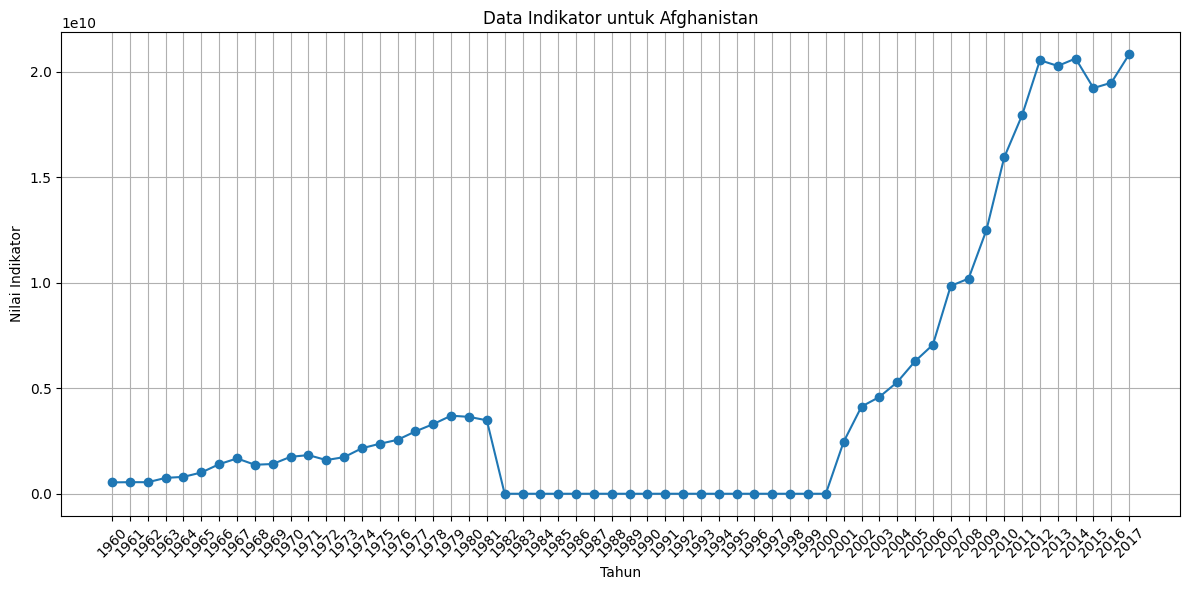

In [174]:

# Plot data untuk negara tertentu (misalnya, Indonesia)
country_name = 'Afghanistan'

# Filter data untuk negara tertentu
country_data = gdp_data[gdp_data['Country Name'] == country_name]

# Pilih kolom tahun (1960-2017) untuk plotting
years = country_data.columns[4:]

# Ambil nilai dari setiap tahun
values = country_data.iloc[:, 4:]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(years, values.values.flatten(), marker='o')
plt.title(f'Data Indikator untuk {country_name}')
plt.xlabel('Tahun')
plt.ylabel('Nilai Indikator')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

3.5 Dummy Variables untuk dataset projects_data.csv

In [177]:
project_data

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,0,Y,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,0.0,0.0,0.0,0.0,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [183]:
# Pilih kolom prodline
project_data_dummy = pd.get_dummies(project_data['prodline'])

# Gabungkan data dummy dengan DataFrame asli
project_with_dummy = pd.concat([project_data, project_data_dummy], axis=1)

# Drop kolom prodline karena sudah tidak diperlukan lagi
project_with_dummy.drop(columns=['prodline'], inplace=True)


In [184]:
project_data_dummy

,CN,DR,GE,GM,GU,MT,PE,RE,RN,SF
0,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
18243,False,False,False,False,False,False,True,False,False,False
18244,False,False,False,False,False,False,True,False,False,False
18245,False,False,False,False,False,False,True,False,False,False
18246,False,False,False,False,False,False,True,False,False,False


3.5 Replace dan Regex

In [187]:
project_data

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,P163962,Africa,Democratic Republic of the Congo;Democratic Re...,PE,Investment Project Financing,IN,B,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,P167672,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,0,Y,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,P158768,South Asia,Islamic Republic of Afghanistan;Islamic Repu...,PE,Investment Project Financing,IN,A,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,P161364,Africa,Federal Republic of Nigeria;Federal Republic o...,PE,Investment Project Financing,IN,B,N,L,Active,...,0.0,0.0,0.0,0.0,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic of Chile;Republic of Chile,PE,Specific Investment Loan,IN,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18244,P037451,Europe and Central Asia,Grand Duchy of Luxembourg;Grand Duchy of Luxem...,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18245,P037362,Europe and Central Asia,Kingdom of Denmark;Kingdom of Denmark,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18246,P037452,Europe and Central Asia,Kingdom of the Netherlands;Kingdom of the Neth...,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [191]:
# Lakukan penggantian hanya pada bagian pertama dari nilai kolom 'Country Name' menggunakan regex
project_data['countryname'] = project_data['countryname'].replace(regex={r'\s.*': ''})

project_data

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,...,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country
0,P162228,Other,World;World,RE,Investment Project Financing,IN,C,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,P163962,Africa,Democratic,PE,Investment Project Financing,IN,B,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,P167672,South Asia,People's,PE,Investment Project Financing,IN,0,Y,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
3,P158768,South Asia,Islamic,PE,Investment Project Financing,IN,A,N,L,Active,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
4,P161364,Africa,Federal,PE,Investment Project Financing,IN,B,N,L,Active,...,0.0,0.0,0.0,0.0,0002327546!$!Ogun State!$!7!$!3.58333!$!NG;000...,0002327546;0002328925;0002565340;0002565343;00...,Ogun State;Niger State;Abia State;Edo;Kebbi St...,7;10;5.41667;6.5;11.5;8,3.58333;6;7.5;6;4;10.5,NG;NG;NG;NG;NG;NG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18243,P006578,Latin America and Caribbean,Republic,PE,Specific Investment Loan,IN,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18244,P037451,Europe and Central Asia,Grand,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18245,P037362,Europe and Central Asia,Kingdom,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
18246,P037452,Europe and Central Asia,Kingdom,PE,Structural Adjustment Loan,AD,0,N,L,Closed,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [192]:
pd_csv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [193]:
# Lakukan penggantian hanya pada bagian pertama dari nilai kolom 'Indicator Name' menggunakan replace()
pd_csv['Indicator Name'] = pd_csv['Indicator Name'].replace({'Population, total': 'Jumlah populasi'})

pd_csv

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Aruba,ABW,Jumlah populasi,SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0
1,Afghanistan,AFG,Jumlah populasi,SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0
2,Angola,AGO,Jumlah populasi,SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0
3,Albania,ALB,Jumlah populasi,SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0
4,Andorra,AND,Jumlah populasi,SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Jumlah populasi,SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0,1830700.0
260,"Yemen, Rep.",YEM,Jumlah populasi,SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0,28250420.0
261,South Africa,ZAF,Jumlah populasi,SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0,56717156.0
262,Zambia,ZMB,Jumlah populasi,SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0,17094130.0


In [194]:
pd_api

,Country Code,Year,Value,Indicator Code,Indicator Name,Country Name
1,BRA,2022,215313498.0,SP.POP.TOTL,"Population, total",Brazil
2,BRA,2021,214326223.0,SP.POP.TOTL,"Population, total",Brazil
3,BRA,2020,213196304.0,SP.POP.TOTL,"Population, total",Brazil
4,BRA,2019,211782878.0,SP.POP.TOTL,"Population, total",Brazil
5,BRA,2018,210166592.0,SP.POP.TOTL,"Population, total",Brazil
...,...,...,...,...,...,...
251,USA,1964,191889000.0,SP.POP.TOTL,"Population, total",United States
252,USA,1963,189242000.0,SP.POP.TOTL,"Population, total",United States
253,USA,1962,186538000.0,SP.POP.TOTL,"Population, total",United States
254,USA,1961,183691000.0,SP.POP.TOTL,"Population, total",United States


In [195]:
# Lakukan penggantian hanya pada bagian pertama dari nilai kolom 'Indicator Name' menggunakan replace()
pd_api['Indicator Name'] = pd_api['Indicator Name'].replace({'Population, total': 'Jumlah populasi'})

pd_api

,Country Code,Year,Value,Indicator Code,Indicator Name,Country Name
1,BRA,2022,215313498.0,SP.POP.TOTL,Jumlah populasi,Brazil
2,BRA,2021,214326223.0,SP.POP.TOTL,Jumlah populasi,Brazil
3,BRA,2020,213196304.0,SP.POP.TOTL,Jumlah populasi,Brazil
4,BRA,2019,211782878.0,SP.POP.TOTL,Jumlah populasi,Brazil
5,BRA,2018,210166592.0,SP.POP.TOTL,Jumlah populasi,Brazil
...,...,...,...,...,...,...
251,USA,1964,191889000.0,SP.POP.TOTL,Jumlah populasi,United States
252,USA,1963,189242000.0,SP.POP.TOTL,Jumlah populasi,United States
253,USA,1962,186538000.0,SP.POP.TOTL,Jumlah populasi,United States
254,USA,1961,183691000.0,SP.POP.TOTL,Jumlah populasi,United States


3.5 Menghapus Outliers

In [10]:
# Fungsi untuk menghapus outliers menggunakan teknik IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

3.6 Scaling Features

In [290]:
# Memilih fitur yang akan di-scaling
features_to_scale = ['lendprojectcost']

# Memastikan fitur-fitur yang dipilih ada dalam dataset
missing_features = set(features_to_scale) - set(project_data.columns)
if missing_features:
    raise KeyError(f"Fitur {missing_features} tidak ada dalam dataset")

# Mengubah tipe data kolom lendprojectcost menjadi float
project_data['lendprojectcost'] = project_data['lendprojectcost'].astype(float)

# Inisialisasi objek scaler
scaler = StandardScaler()

# Melakukan scaling pada fitur-fitur yang dipilih
project_data[features_to_scale] = scaler.fit_transform(project_data[features_to_scale])

# Menampilkan dataset setelah scaling
project_data


            id               regionname            countryname prodline  \
158    P163945                   Africa                Western       GE   
269    P166205  Europe and Central Asia  Montenegro;Montenegro       GU   
350    P163582                   Africa               Republic       GE   
355    P158137                   Africa          Africa;Africa       GE   
504    P163720  Europe and Central Asia               Republic       GE   
...        ...                      ...                    ...      ...   
17725  P042778                   Africa          Africa;Africa       PE   
17726  P042780                   Africa               Republic       PE   
17727  P042781                   Africa                 United       PE   
17728  P042782                   Africa               Republic       PE   
17729  P043701                   Africa          Africa;Africa       PE   

                       lendinginstr lendinginstrtype envassesmentcategorycode  \
158    Investment 

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21532\1860553829.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\lenovo\AppData\Local\Temp\ipykernel_21532\1860553829.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



4. Load Kolom countryname, countrycode, year, gdp, population, gdppercapita, ruralpopulationpercent, electricityaccesspercent, dan projectcost adalah kolom yang akan di load ke dalam database, file dam cloud storage.

In [45]:
# Menggabungkan dataset
def merge_datasets(datasets):
    merged_data = pd.merge(datasets['pd_csv'], datasets['electricity_access'], on=['countrycode', 'year'], how='outer')
    merged_data = pd.merge(merged_data, datasets['project_data'], on=['countrycode', 'year'], how='outer')
    merged_data = pd.merge(merged_data, datasets['rural_population'], on=['countrycode', 'year'], how='outer')
    merged_data = pd.merge(merged_data, datasets['pd_db'], on=['countrycode', 'year'], how='outer')
    merged_data = pd.merge(merged_data, datasets['pd_json'], on=['countrycode', 'year'], how='outer')
    merged_data = pd.merge(merged_data, datasets['pd_xml'], on=['countrycode', 'year'], how='outer')
    
    if not datasets['pd_api'].empty:
        merged_data = pd.merge(merged_data, datasets['pd_api'], on=['countrycode', 'year'], how='outer')
    
    return merged_data

In [ ]:
# Menyimpan hasil gabungan DataFrame ke dalam file CSV
merge_datasets.to_csv('merged_dataset.csv', index=False)

In [ ]:
# Inisialisasi aplikasi Firebase dengan menggunakan sertifikat
cred = credentials.Certificate("C:/Users/lenovo/Downloads/de-in-cloud-784ae-firebase-adminsdk-acem9-3be4914f6a.json")
firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://your-database-name.firebaseio.com/'
})

In [ ]:
# Referensi ke database
ref = db.reference('/')

# Memasukkan data ke Firebase Realtime Database
ref.push(merge_datasets)

5. Data Visualization

5.1 Visualisasikan data

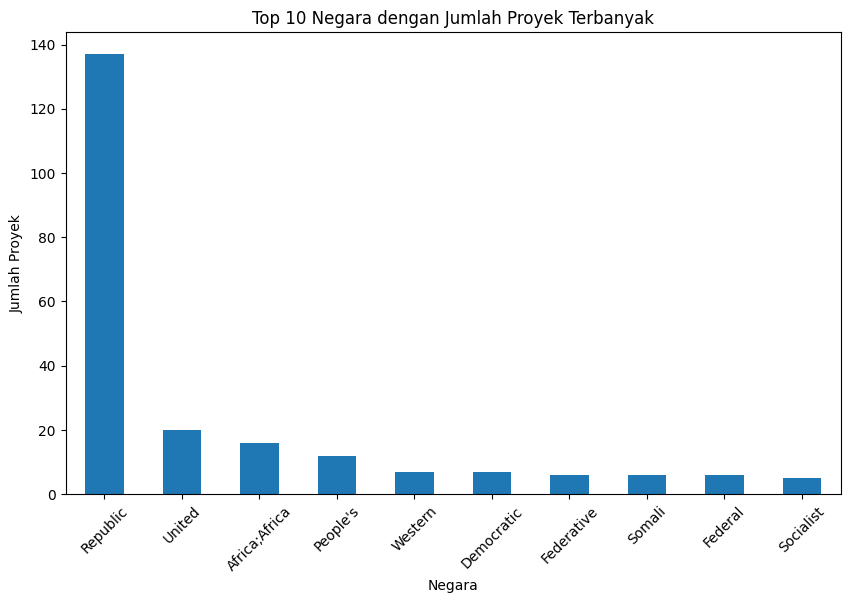

In [233]:
# Visualisasikan data Project Data
plt.figure(figsize=(10, 6))
project_data['countryname'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Negara dengan Jumlah Proyek Terbanyak')
plt.xlabel('Negara')
plt.ylabel('Jumlah Proyek')
plt.xticks(rotation=45)
plt.show()

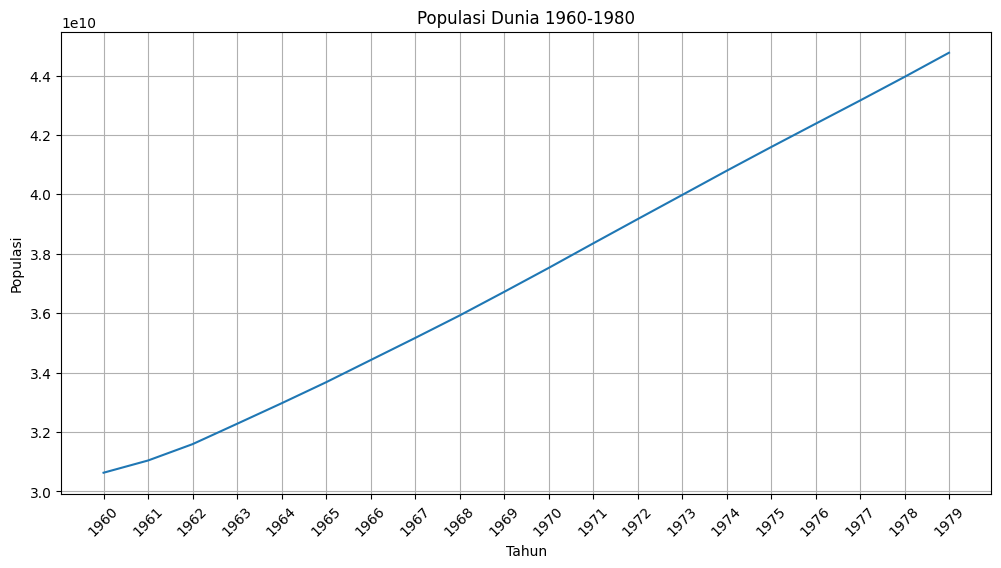

In [241]:
# Visualisasikan data population_data.csv
# Ambil kolom tahun 1960-2017
years = [str(year) for year in range(1960, 1980)]
pd_csv = pd_csv[years]

# Hitung jumlah populasi dunia per tahun
world_population = pd_csv.sum()

# Visualisasikan data
plt.figure(figsize=(12, 6))
plt.plot(world_population.index, world_population.values)
plt.title('Populasi Dunia 1960-1980')
plt.xlabel('Tahun')
plt.ylabel('Populasi')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

5.2 Analisis data di project_data.csv

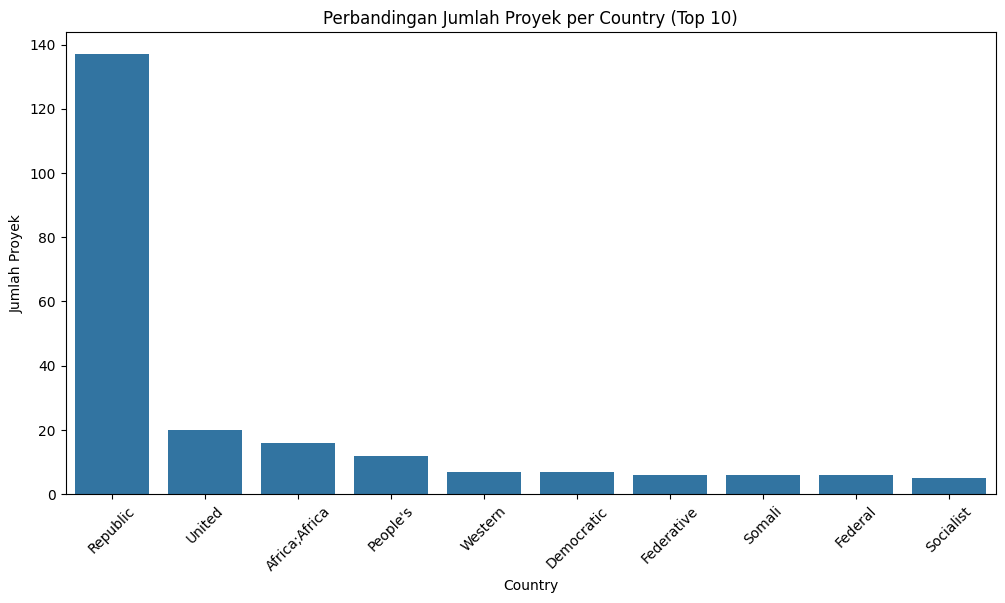

In [279]:
# Analisis Perbandingan Jumlah Proyek per Country
project_count_by_country = project_data['countryname'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=project_count_by_country.index, y=project_count_by_country.values)
plt.xlabel('Country')
plt.ylabel('Jumlah Proyek')
plt.title('Perbandingan Jumlah Proyek per Country (Top 10)')
plt.xticks(rotation=45)
plt.show()

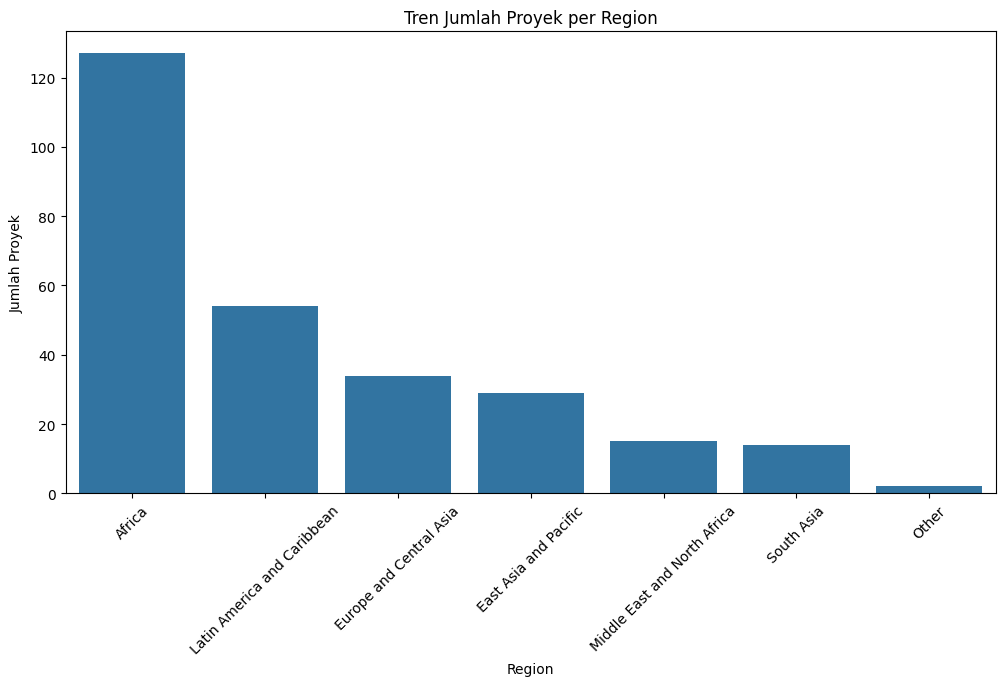

In [280]:
# Analisis Tren Jumlah Proyek per Region
project_count_by_region = project_data['regionname'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=project_count_by_region.index, y=project_count_by_region.values)
plt.xlabel('Region')
plt.ylabel('Jumlah Proyek')
plt.title('Tren Jumlah Proyek per Region')
plt.xticks(rotation=45)
plt.show()